In [9]:
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
df_train = pd.read_csv("../data/DailyDelhiClimateTrain.csv", parse_dates=True)
df_test = pd.read_csv("../data/DailyDelhiClimateTest.csv", parse_dates=True)

In [15]:
df_train.head()
df_test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [25]:
df_train.describe()
#df_test.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


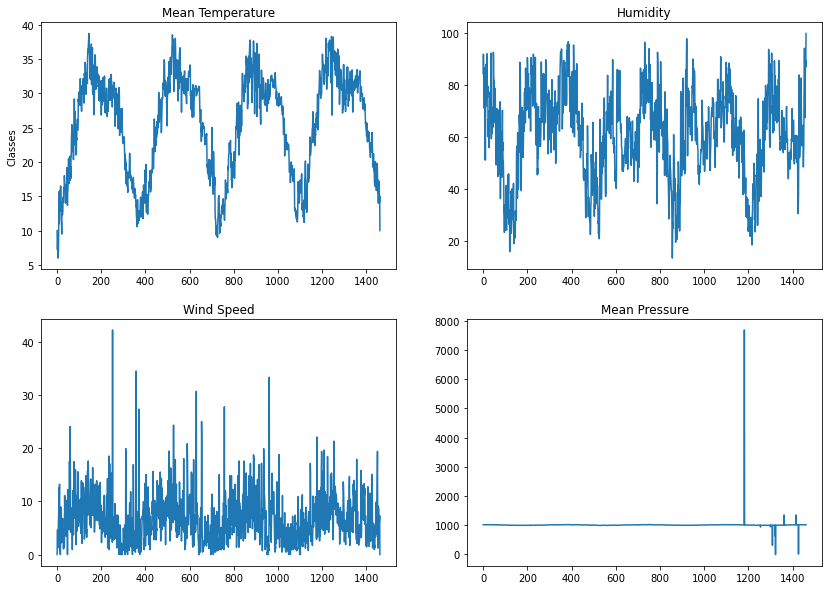

In [24]:
fig = plt.figure(figsize=(14, 10))
rows = 2
columns = 2

ax1 = fig.add_subplot(rows, columns, 1)
ax1.set_title("Mean Temperature")
plt.ylabel('Classes')
df_train["meantemp"].plot()

ax1 = fig.add_subplot(rows, columns, 2)
ax1.set_title("Humidity")
df_train["humidity"].plot()

ax1 = fig.add_subplot(rows, columns, 3)
ax1.set_title("Wind Speed")
df_train["wind_speed"].plot()

ax1 = fig.add_subplot(rows, columns, 4)
ax1.set_title("Mean Pressure")
df_train["meanpressure"].plot()

plt.show()

In [20]:
df_test.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object